# Figure 1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage

## Figure 1d

### Load Source Data

In [5]:
data_fig1d_fitphase = pd.read_csv('../source-data/data-fig1d-fitphase.csv')
data_fig1d_fitauc = pd.read_csv('../source-data/data-fig1d-fitAUC.csv')

### Polar Distribution

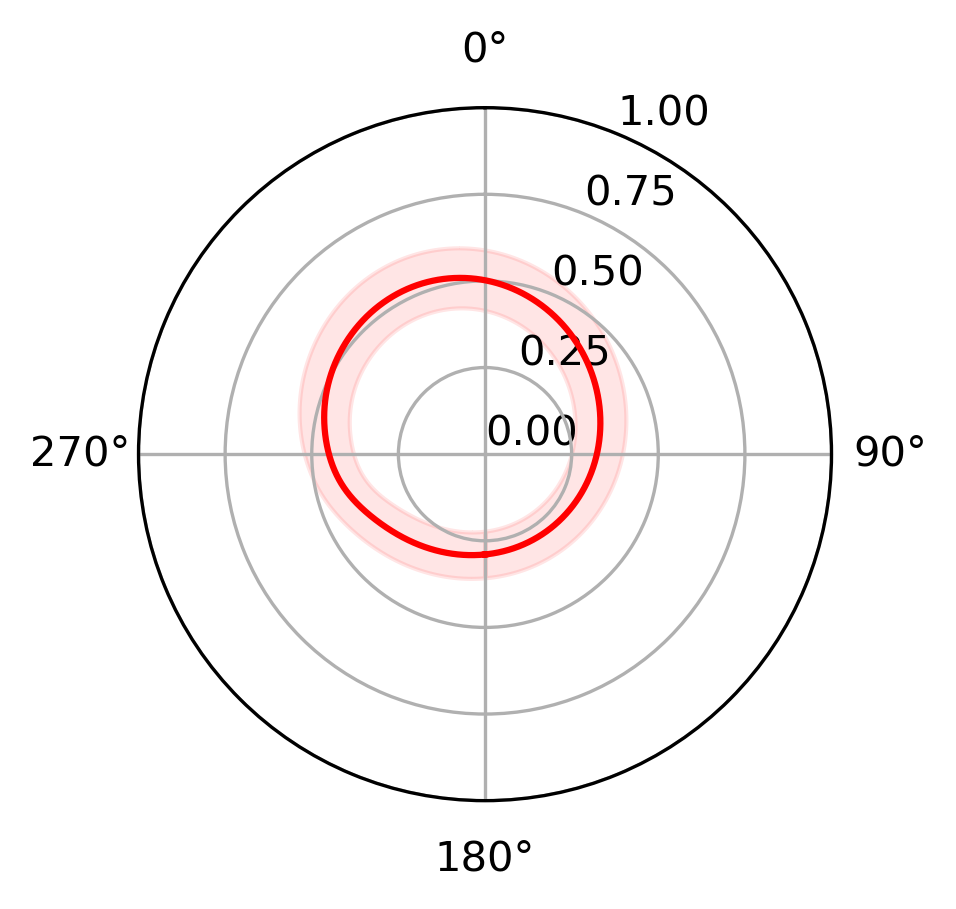

In [6]:
plt.figure(figsize=(3,3), dpi=300)
ax = plt.subplot(111, projection='polar')

ax.plot(data_fig1d_fitphase['phase'],
        data_fig1d_fitphase.iloc[:,1:].mean(axis=1),
        color='r')
ax.fill_between(data_fig1d_fitphase['phase'],
                data_fig1d_fitphase.iloc[:,1:].mean(axis=1) - data_fig1d_fitphase.iloc[:,1:].sem(axis=1),
                data_fig1d_fitphase.iloc[:,1:].mean(axis=1) + data_fig1d_fitphase.iloc[:,1:].sem(axis=1),
                color='r', alpha=0.1)


ax.set_ylim(0, 1)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
plt.show()

### Linearized Distribution

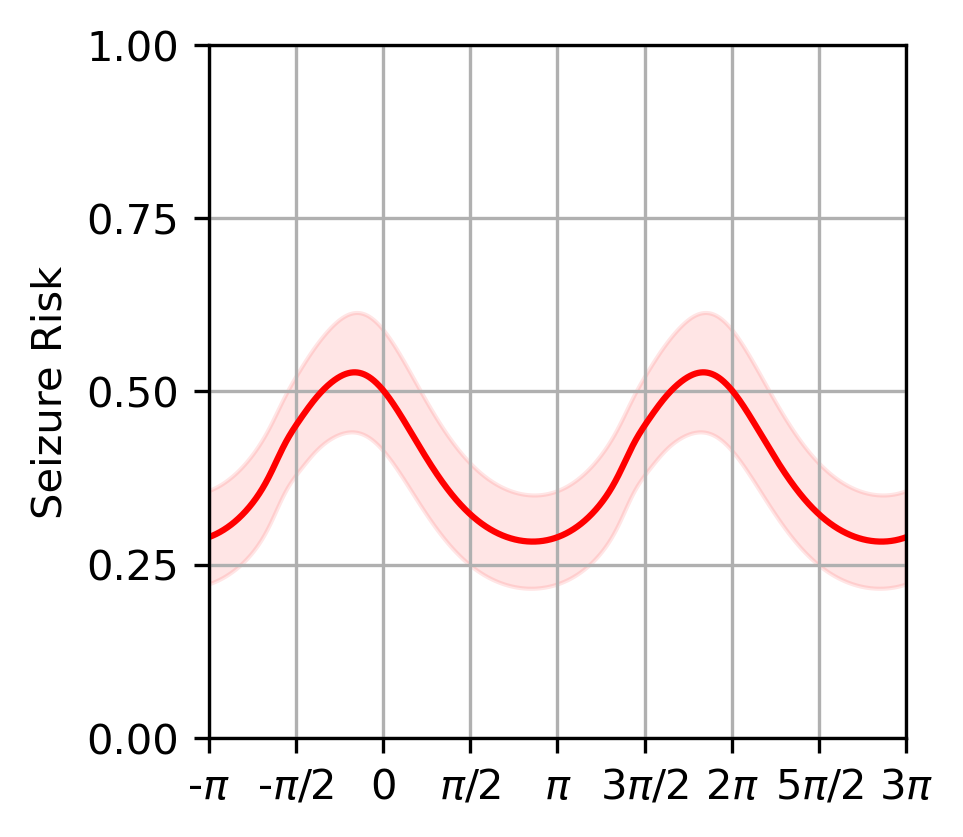

In [7]:
data_fig1d_fitphase_cyc2 = data_fig1d_fitphase.copy()
data_fig1d_fitphase_cyc2['phase'] += 2*np.pi

data_fig1d_fitphase_lin = pd.concat((data_fig1d_fitphase, data_fig1d_fitphase_cyc2), axis=0).reset_index(drop=True)

plt.figure(figsize=(3,3), dpi=300)
ax = plt.subplot(111)
ax.plot(data_fig1d_fitphase_lin['phase'], data_fig1d_fitphase_lin.iloc[:, 1:].mean(axis=1), color='r')
ax.fill_between(data_fig1d_fitphase_lin['phase'],
                data_fig1d_fitphase_lin.iloc[:, 1:].mean(axis=1)-data_fig1d_fitphase_lin.iloc[:, 1:].sem(axis=1),
                data_fig1d_fitphase_lin.iloc[:, 1:].mean(axis=1)+data_fig1d_fitphase_lin.iloc[:, 1:].sem(axis=1),
                color='r', alpha=0.1)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ticks = [-np.pi, -np.pi/2, 0, np.pi/2,
          np.pi, 3*np.pi/2, 2*np.pi, 5*np.pi/2,
          3*np.pi]
ax.set_xlim([ticks[0], ticks[-1]])
ax.set_xticks(ticks)
ax.grid(True)

ax.set_xticklabels([r'-$\pi$', r'-$\pi/2$', r'$0$', r'$\pi/2$',
                    r'$\pi$', r'$3\pi/2$', r'$2\pi$', r'$5\pi/2$',
                    r'$3\pi$'], rotation=0)

ax.set_ylabel('Seizure Risk')
plt.show()

## Figure 1e

### Load Source Data

In [8]:
data_fig1e_intra_ts = pd.read_csv('../source-data/data-fig1e-pop_intra_map_ts.csv').set_index('wavelet')
data_fig1e_intra_pv = pd.read_csv('../source-data/data-fig1e-pop_intra_map_pv.csv').set_index('wavelet')
data_fig1e_inter_ts = pd.read_csv('../source-data/data-fig1e-pop_inter_map_ts.csv').set_index('wavelet')
data_fig1e_inter_pv = pd.read_csv('../source-data/data-fig1e-pop_inter_map_pv.csv').set_index('wavelet')

### Local Connectivity

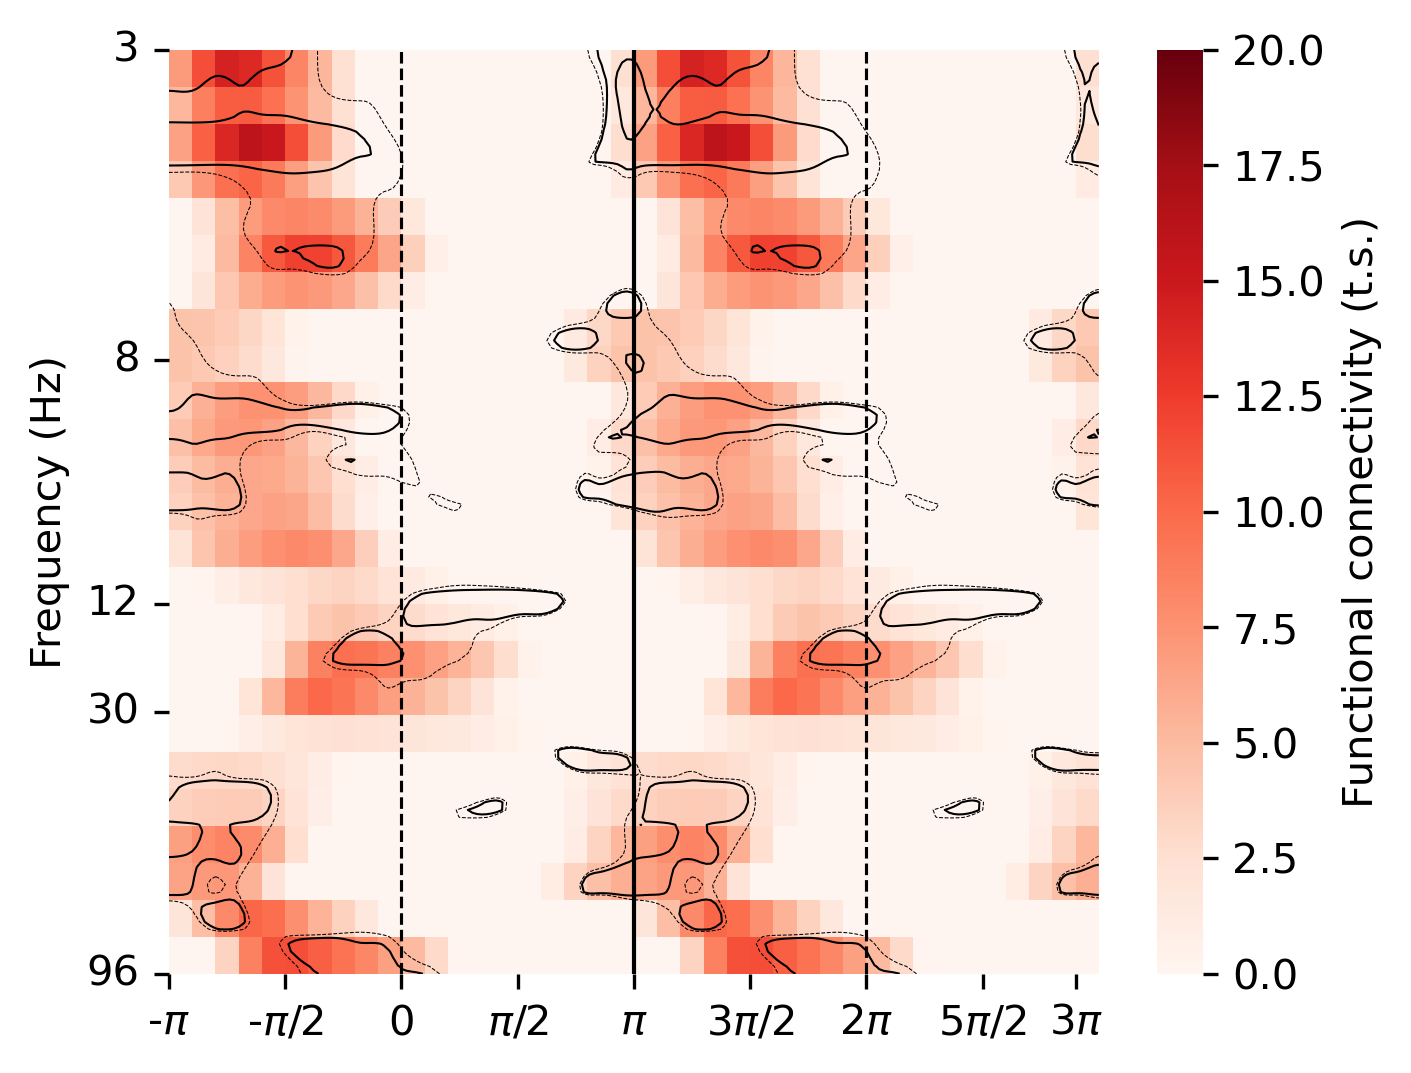

In [9]:
plt.figure(figsize=(5,4), dpi=300)
ax = plt.subplot(111)
sns.heatmap(data_fig1e_intra_ts, cmap='Reds',
            vmin=0, vmax=20, cbar_kws={'label': 'Functional connectivity (t.s.)'})

smooth_scale = 5
z = ndimage.zoom(data_fig1e_intra_pv.to_numpy(), smooth_scale)       
cntr = ax.contour(np.linspace(0, len(data_fig1e_intra_pv.columns), len(data_fig1e_intra_pv.columns) * smooth_scale),
                  np.linspace(0, len(data_fig1e_intra_pv.index), len(data_fig1e_intra_pv.index) * smooth_scale),
                  z, levels=(0.001, 0.01),
                  colors='black',
                  linewidths=[0.5,0.25],
                  linestyles=['-', '--'])

ax.axvline(np.abs(data_fig1e_intra_ts.columns.astype(float)-0*np.pi).argmin(), linestyle='--', linewidth=0.75, color='k')
ax.axvline(np.abs(data_fig1e_intra_ts.columns.astype(float)-2*np.pi).argmin(), linestyle='--', linewidth=0.75, color='k')
ax.axvline(np.abs(data_fig1e_intra_ts.columns.astype(float)-1*np.pi).argmin(), linestyle='-', linewidth=1, color='k')    

#ticks = [int(float(tick.get_text())) for tick in ax.get_yticklabels()]
#ax.set_yticklabels(ticks)   

ticks = [np.argmin(np.abs(np.array(data_fig1e_intra_ts.columns.astype(float)) - ang))
         for ang in [-np.pi, -np.pi/2, 0, np.pi/2,
                     np.pi, 3*np.pi/2, 2*np.pi, 5*np.pi/2,
                     3*np.pi]]
ax.set_xticks(ticks)
ax.set_xticklabels([r'-$\pi$', r'-$\pi/2$', r'$0$', r'$\pi/2$',
                    r'$\pi$', r'$3\pi/2$', r'$2\pi$', r'$5\pi/2$',
                    r'$3\pi$'], rotation=0)

ax.set_ylabel('Frequency (Hz)')

yticks = np.array([3, 8, 12, 30, 96])
ticks = (np.log10(data_fig1e_intra_ts.index)[-1] - np.log10(yticks)) * (data_fig1e_intra_ts.shape[0] /
                            (np.log10(data_fig1e_intra_ts.index)[-1] - 
                             np.log10(data_fig1e_intra_ts.index)[0]))
ax.set_yticks(ticks[::-1])
ax.set_yticklabels(yticks)

ax.set_ylabel('Frequency (Hz)')

plt.show()

### Long-Range Connectivity

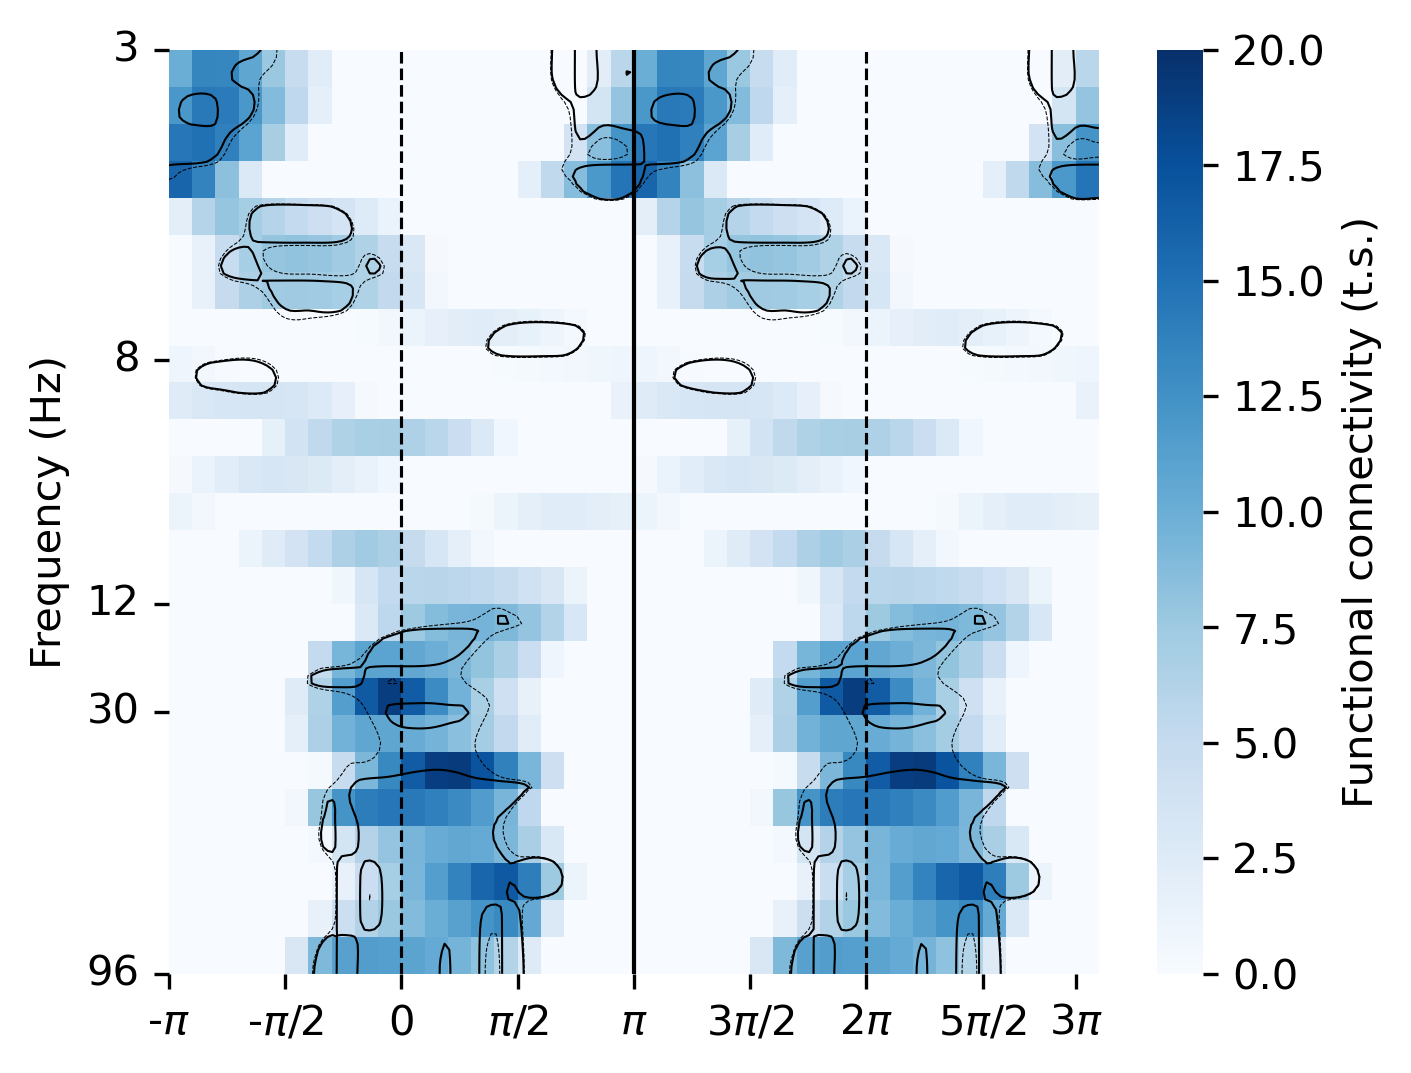

In [10]:
plt.figure(figsize=(5,4), dpi=300)
ax = plt.subplot(111)
sns.heatmap(data_fig1e_inter_ts, cmap='Blues',
            vmin=0, vmax=20, cbar_kws={'label': 'Functional connectivity (t.s.)'})

smooth_scale = 5
z = ndimage.zoom(data_fig1e_inter_pv.to_numpy(), smooth_scale)       
cntr = ax.contour(np.linspace(0, len(data_fig1e_inter_pv.columns), len(data_fig1e_inter_pv.columns) * smooth_scale),
                  np.linspace(0, len(data_fig1e_inter_pv.index), len(data_fig1e_inter_pv.index) * smooth_scale),
                  z, levels=(0.001, 0.01),
                  colors='black',
                  linewidths=[0.5,0.25],
                  linestyles=['-', '--'])

ax.axvline(np.abs(data_fig1e_inter_ts.columns.astype(float)-0*np.pi).argmin(), linestyle='--', linewidth=0.75, color='k')
ax.axvline(np.abs(data_fig1e_inter_ts.columns.astype(float)-2*np.pi).argmin(), linestyle='--', linewidth=0.75, color='k')
ax.axvline(np.abs(data_fig1e_inter_ts.columns.astype(float)-1*np.pi).argmin(), linestyle='-', linewidth=1, color='k')    

#ticks = [int(float(tick.get_text())) for tick in ax.get_yticklabels()]
#ax.set_yticklabels(ticks)   

ticks = [np.argmin(np.abs(np.array(data_fig1e_inter_ts.columns.astype(float)) - ang))
         for ang in [-np.pi, -np.pi/2, 0, np.pi/2,
                     np.pi, 3*np.pi/2, 2*np.pi, 5*np.pi/2,
                     3*np.pi]]
ax.set_xticks(ticks)
ax.set_xticklabels([r'-$\pi$', r'-$\pi/2$', r'$0$', r'$\pi/2$',
                    r'$\pi$', r'$3\pi/2$', r'$2\pi$', r'$5\pi/2$',
                    r'$3\pi$'], rotation=0)

yticks = np.array([3, 8, 12, 30, 96])
ticks = (np.log10(data_fig1e_inter_ts.index)[-1] - np.log10(yticks)) * (data_fig1e_inter_ts.shape[0] /
                            (np.log10(data_fig1e_inter_ts.index)[-1] - 
                             np.log10(data_fig1e_inter_ts.index)[0]))
ax.set_yticks(ticks[::-1])
ax.set_yticklabels(yticks)

ax.set_ylabel('Frequency (Hz)')

plt.show()